In [ ]:
%pip install -q roboflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 951.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.1 MB/s eta 0:00:00


In [ ]:

!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt comet_ml  # install



Cloning into 'yolov5'...
remote: Enumerating objects: 16003, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 16003 (delta 21), reused 20 (delta 13), pack-reused 15967
Receiving objects: 100% (16003/16003), 14.66 MiB | 23.53 MiB/s, done.
Resolving deltas: 100% (10987/10987), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 567.2/567.2 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.0/190.0 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 617.3/617.3 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.8/224.8 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.2/512.2 kB 16.4 MB/s eta

In [ ]:
import pandas as pd
import numpy as np
import cv2
import os
import torch
import utils
display = utils.notebook_init()  # checks


YOLOv5 🚀 v7.0-226-gdd9e338 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.7/78.2 GB disk)


In [ ]:
display

<module 'IPython.display' from '/usr/local/lib/python3.10/dist-packages/IPython/display.py'>

In [ ]:
os.environ['DATASET_DIRECTORY']="/content/palm_dataset"

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="***********")
project = rf.workspace("detectiongazflares-46m4e").project("palm_detection-tbcor")
dataset = project.version(4).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to /content/palm_dataset/Palm_Detection-4 in yolov5pytorch:: 100%|██████████| 3372/3372 [00:01<00:00, 2356.27it/s]


# Training

In [ ]:
!python /content/yolov5/train.py --img 640 --epochs 50 --data /content/palm_dataset/Palm_Detection-4/data.yaml --weights /content/yolov5n.pt --cache


the best weight file can be found at the following path:

/content/yolov5/runs/train/exp/weights/best.pt


In [ ]:
from google.colab import files

file_path = '/content/yolov5/runs/train'

files.download(file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

file_path = '/content/yolov5/runs/train'

files.download(file_path)


# Detection 

In [ ]:
!python /content/yolov5/detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source /content/palm_dataset/Palm_Detection-4/test/images/4_jpg.rf.065ee7d644d10357352b442572e5b410.jpg

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/palm_dataset/Palm_Detection-4/test/images/4_jpg.rf.065ee7d644d10357352b442572e5b410.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-226-gdd9e338 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 1760518 parameters, 0 gradients, 4.1 GFLOPs
image 1/1 /content/palm_dataset/Palm_Detection-4/test/images/4_jpg.rf.065ee7d644d10357352b442572e5b410.jpg: 640x640 440 Palm_Treess, 5.4ms
Speed: 0.6ms pre-process, 5.4ms inference, 93.3ms NMS per image at shape (1, 3, 640, 640)
Results s

In [ ]:
import cv2


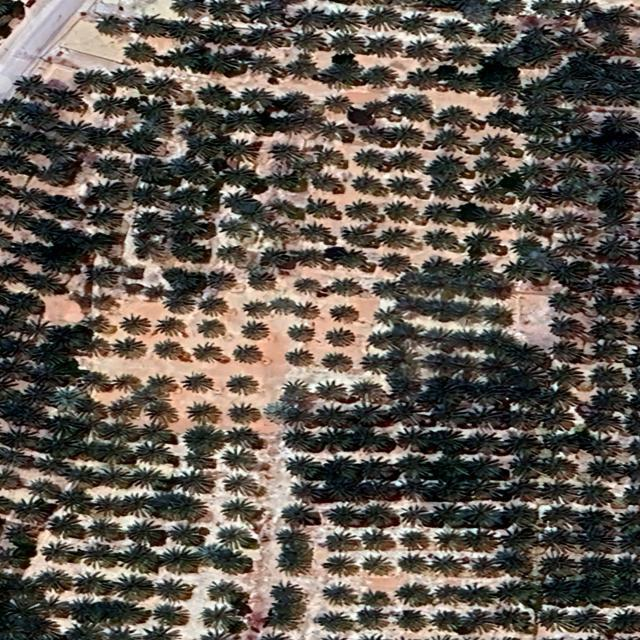

In [ ]:
from google.colab.patches import cv2_imshow
original_image = cv2.imread('/content/palm_dataset/Palm_Detection-4/test/images/4_jpg.rf.065ee7d644d10357352b442572e5b410.jpg')

cv2_imshow(original_image)



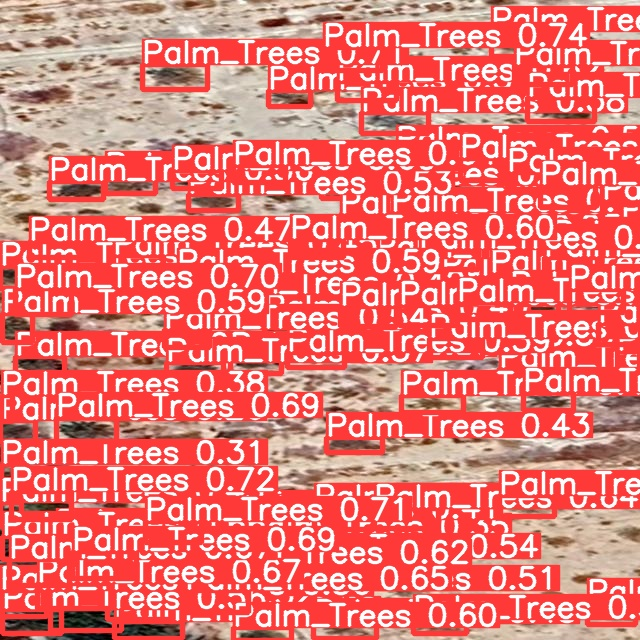

In [ ]:
cv2_imshow( bounding_boxes_image)
